In [1]:
import math
import random
import os

from app_settings import set_random_seed,set_global_settings
set_random_seed()
set_global_settings()



from pypinyin import pinyin, Style
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from IPython.display import display, Javascript
import tensorflow as tf
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import spearmanr
from UCBCapstone_data_io import *
from UCBCapstone_data_prepare import *
from UCBCapstone_data_view import *
from UCBCapstone_models import *
from UCBCapstone_backtrader import *



%load_ext autoreload
%autoreload 2


2025-07-26 14:50:33.529456: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-26 14:50:33.540364: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753566633.553641 3082621 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753566633.557456 3082621 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1753566633.567607 3082621 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

### Prepare data for model training
    - future contract trading data for all top 50 dealers will be pivoted into one row per trading day.
    - Only 20 out of 380+ columns are shown here 

In [2]:
product='IC'
df_index_future, df_future_trading, df_index =read_all(product)
df_vol_percent=get_total_trade_vol_top_dealers(df_future_trading) 
df_future_top=get_idx_future_top_traders(df_future_trading,50)

510500.SS already exists, skip downloading...


In [3]:
df_future_pivoted =pivote_df_future(df_future_top)
df_idx_with_future_trades =df_index.merge(df_future_pivoted, left_index=True, right_index=True, how='left').fillna(0)
df_idx_with_future_trades.dropna(inplace=True)
df_idx_with_future_trades[df_idx_with_future_trades.columns[:20]].tail(1)

,Close,High,Low,Open,Volume,baochengqihuo_volume,dongfangcaifu_volume,donghaiqihuo_volume,dongxingqihuo_volume,dongzhengqihuo_volume,fangzhengzhongqi_volume,guangdaqihuo_volume,guangfaqihuo_volume,guofuqihuo_volume,guolianqihuo_volume,guotaijunan_volume,guotouanxin_volume,guotouqihuo_volume,guoxinqihuo_volume,haitongqihuo_volume
Date,,,,,,,,,,,,,,,,,,,,
2025-07-02,5.947,5.966,5.929,5.961,129745489,0.0,0.0,539.0,0.0,7660.0,0.0,1604.0,2157.0,0.0,531.0,24091.0,0.0,1085.0,4997.0,9541.0


### Train and predict for regression models
    - All the code is wrapped in the function train_predict_all_models in UCBCapstone_models.py

In [4]:
%load_ext autoreload
%autoreload 2
product = 'IC'

df_train_test_result= train_predict_all_models(product, important_features=[], classification=False, epochs=500)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Train, test and predict on CSI future contract:"IC classification=False"...
510500.SS already exists, skip downloading...
Epoch 1/500


I0000 00:00:1753566703.119605 3082621 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2248 MB memory:  -> device: 0, name: NVIDIA T1000, pci bus id: 0000:01:00.0, compute capability: 7.5
2025-07-26 14:51:43.370060: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.3862 - mae: 0.4509 - val_loss: 4559300886433628160.0000 - val_mae: 1428087296.0000
Epoch 2/500
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0749 - mae: 0.1989 - val_loss: 1291530613328707584.0000 - val_mae: 759746304.0000
Epoch 3/500
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0341 - mae: 0.1352 - val_loss: 194492130800959488.0000 - val_mae: 291851552.0000
Epoch 4/500
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0220 - mae: 0.1055 - val_loss: 38706979710959616.0000 - val_mae: 123822264.0000
Epoch 5/500
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0150 - mae: 0.0844 - val_loss: 2451283864715264.0000 - val_mae: 27891150.0000
Epoch 6/500
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0134 - mae: 0.0816 - val_loss: 3447309060800512.0000 - val_mae: 32620568.0000
Epoch 7/500
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0096 - mae: 0.0686 - val_loss: 5177822519754752.0000 - val_mae: 39942292.0000
Epoch 8/500
36/36 

2025-07-26 14:52:13.807756: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


In [5]:
df_train_test_result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 0 to 8
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   product        9 non-null      object        
 1   model_name     9 non-null      object        
 2   IC%            9 non-null      float64       
 3   rmse           9 non-null      float64       
 4   prediction%    0 non-null      float64       
 5   start_date     9 non-null      datetime64[ns]
 6   last_date      9 non-null      datetime64[ns]
 7   model          9 non-null      object        
 8   history        1 non-null      object        
 9   feature_names  9 non-null      object        
dtypes: datetime64[ns](2), float64(3), object(5)
memory usage: 792.0+ bytes


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 363)            │           727 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       372,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,930,908 (7.37 MB)

 Trainable params: 643,393 (2.45 MB)

 Non-trainable params: 727 (2.84 KB)

 Optimizer params: 1,286,788 (4.91 MB)

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


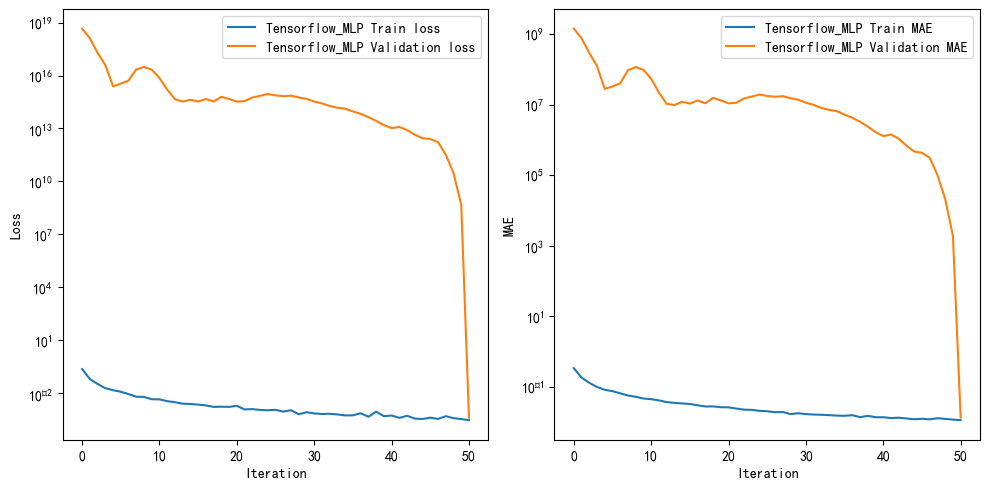

In [6]:
%load_ext autoreload
%autoreload 2
for model_name in ['Tensorflow_MLP']:
    model=get_model(df_train_test_result, model_name)
    model.values[0].summary()
    plot_tensorflow_train_history(df_train_test_result, model_name)


In [8]:

voting_model=get_model(df_train_test_result, 'VotingRegressor').values[0]

In [9]:
voting_model

,steps,"[('scaler', ...), ('voting_clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,estimators,"[('LinearRegression', ...), ('RidgeRegression', ...), ...]"
,weights,None
,n_jobs,None
,verbose,False


In [24]:
df_train_test_result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 0 to 10
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   product        11 non-null     object        
 1   model_name     11 non-null     object        
 2   IC%            11 non-null     float64       
 3   rmse           11 non-null     float64       
 4   prediction%    0 non-null      float64       
 5   start_date     11 non-null     datetime64[ns]
 6   last_date      11 non-null     datetime64[ns]
 7   model          11 non-null     object        
 8   history        3 non-null      object        
 9   feature_names  11 non-null     object        
dtypes: datetime64[ns](2), float64(3), object(5)
memory usage: 968.0+ bytes


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload

Feature Importance for LinearRegression:

Feature Importance for RidgeRegression:

Feature Importance for KnnRegressor:

Feature Importance for DecisionTreeRegressor:

Feature Importance for TransformedTargetRegressor:

Feature Importance for AdaBoostRegressor:

Feature Importance for XGBRegressor:


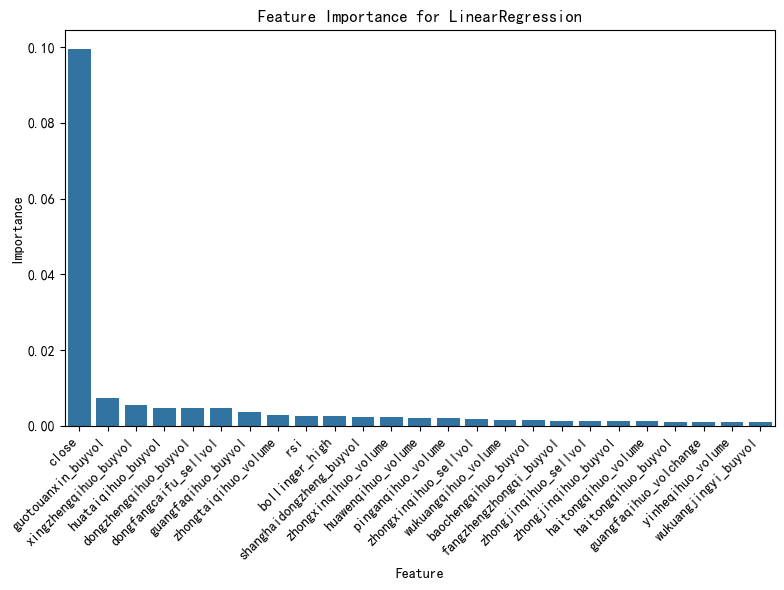

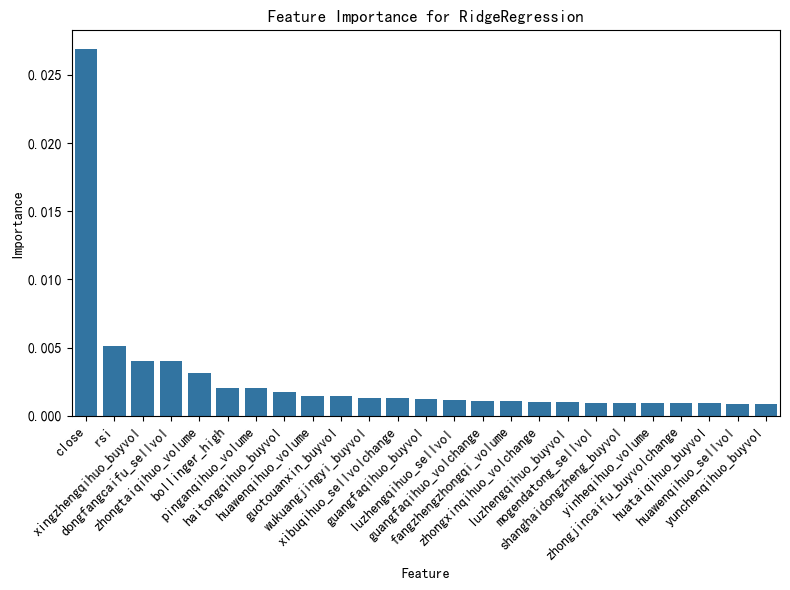

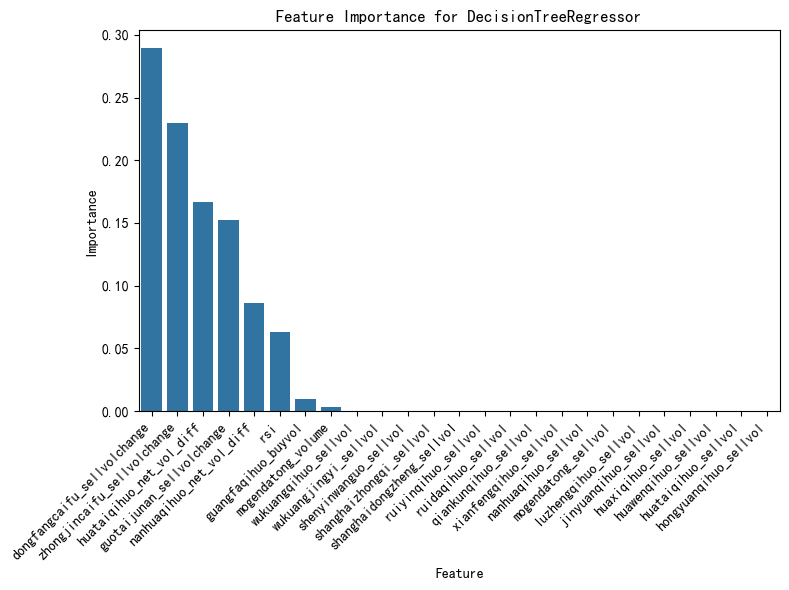

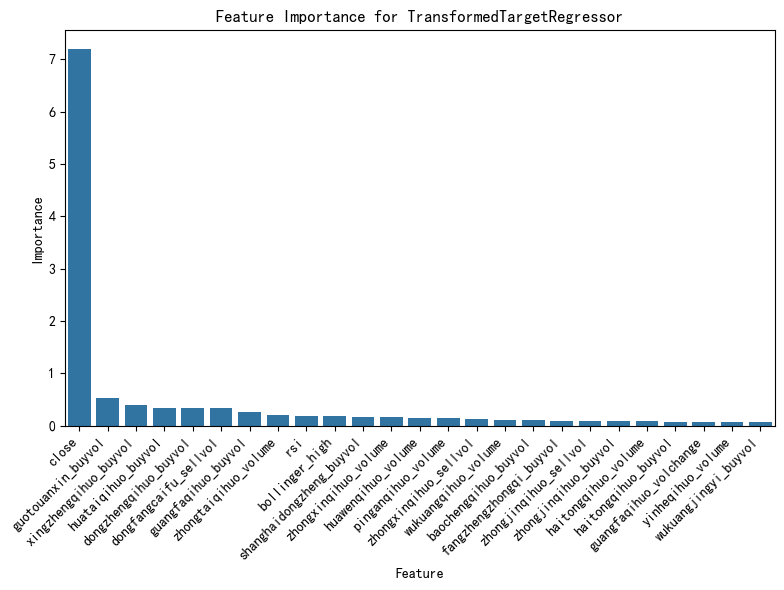

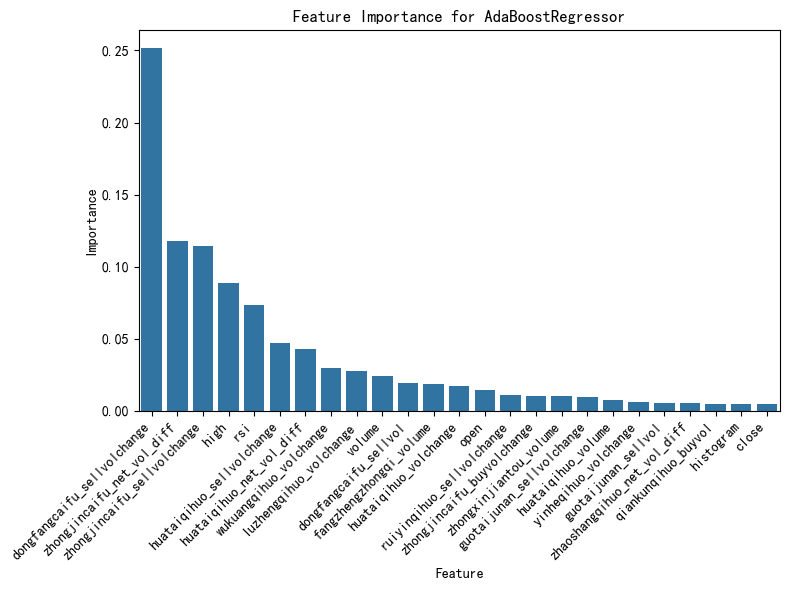

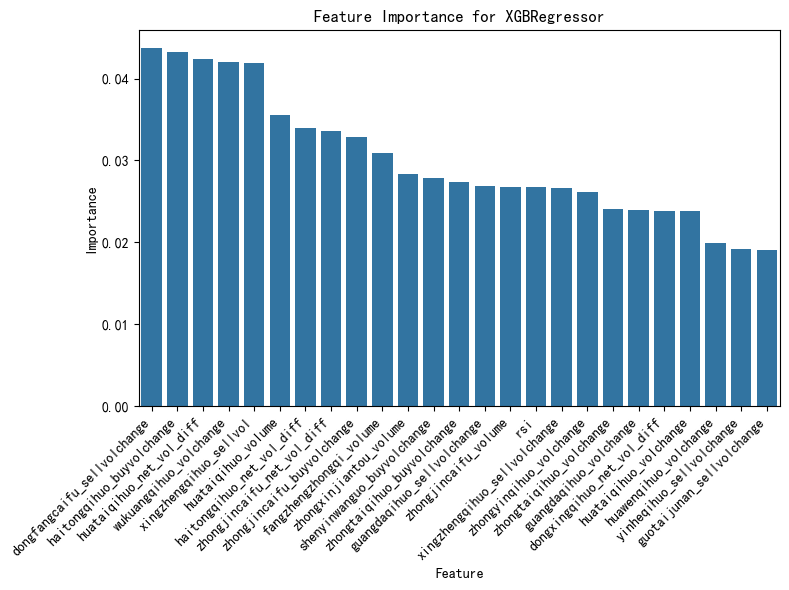

In [10]:
%load_ext autoreload
%autoreload 2
feature_names=get_deature_names(df_train_test_result)
#plot_feature_importance(voting_model,'RidgeRegression', feature_names)
#for model_name in ['LinearRegression','XGBRegressor']:
plot_feature_importance(voting_model, feature_names)


### Train and predict for classification models
    - All the code is wrapped in the function train_predict_all_models in UCBCapstone_models.py

In [11]:
%load_ext autoreload
%autoreload 2
df_train_test_result= train_predict_all_models(product, important_features=[], classification=True, epochs=200)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Train, test and predict on CSI future contract:"IC classification=True"...
510500.SS already exists, skip downloading...


2025-07-26 14:53:44.671153: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-07-26 14:55:22.132729: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (None, 363)            │           727 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1024)           │       372,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,930,908 (7.37 MB)

 Trainable params: 643,393 (2.45 MB)

 Non-trainable params: 727 (2.84 KB)

 Optimizer params: 1,286,788 (4.91 MB)

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

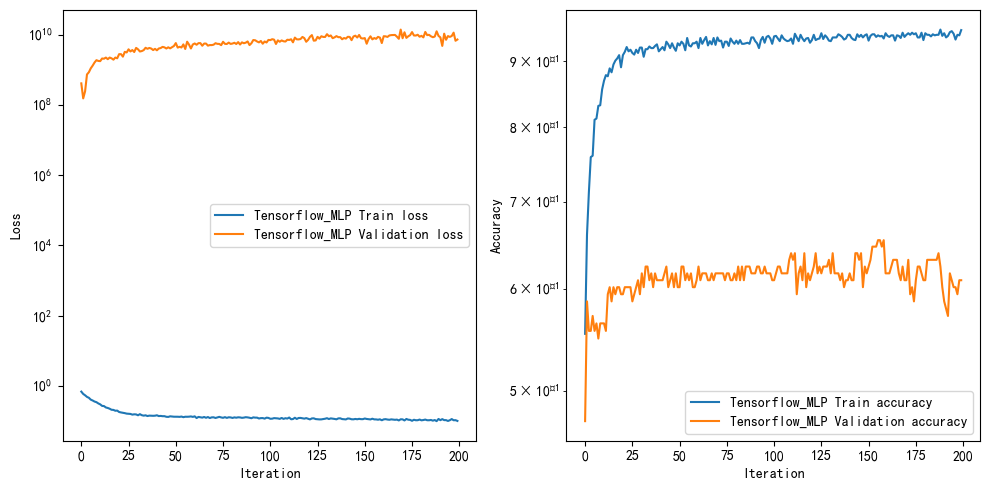

In [12]:
%load_ext autoreload
%autoreload 2
for model_name in ['Tensorflow_MLP']:
    model=get_model(df_train_test_result, model_name)
    model.values[0].summary()
    plot_tensorflow_train_history(df_train_test_result, model_name, classification=True)

In [30]:
voting_model=get_model(df_train_test_result, 'VotingClassifier').values[0]
voting_model

,steps,"[('scaler', ...), ('voting_clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,estimators,"[('LogisticRegression', ...), ('KNeighborsClassifier', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
